### NOTE: In colon cancer type, there are no 'Hotspot Missense' mutations. All Mutations in a hotspot are truncating.

Proteins: TP53, AURKA, CDK1, XPO1, STK11

# Examine trans effect of TP53 Hotspot mutation in Ovarian Cancer

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import cptac
import cptac.utils as ut

import seaborn as sns
import matplotlib as plt

co = cptac.Colon()

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Use parse hotspot utility to analyze TP53 hotspot mutation in Ovarian cancer

#### Get somatic mutation data from cptac

In [2]:
somatic_mutations = co.get_somatic_mutation()

#### Use parse hotspot utility

In [3]:
vis, binary, detailed, dictionary = ut.parse_hotspot('../../HotspotClusterFiles/DanHeader_MyData.maf.3D_Proximity.pairwise.recurrence.l0.r10.clusters', somatic_mutations)

#### Select only TP53 Hotspots

In [4]:
#There are two TP53 hotspots
TP53_Hotspots = detailed[['TP53','TP53_1']]
TP53_Hotspots.head()

,TP53,TP53_1
sample_id,,
S001,No,No
S002,No,No
S003,No,No
S004,No,No
S005,No,No


#### Make binary column for samples that have a TP53 Hotspot Mutation

In [5]:
TP53_Hotspots['Hotspot_Mutation'] = ''
for ind, row in TP53_Hotspots.iterrows():
    for col in TP53_Hotspots.columns:
        if row[col] == 'Yes_HS':
            TP53_Hotspots.loc[ind,'Hotspot_Mutation'] = 'TP53_Hotspot_Mutation'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [6]:
binary_hotspots = TP53_Hotspots['Hotspot_Mutation']

#### Get Proteomic data, append Binary hotspot mutation column

In [7]:
proteomics_df = co.join_omics_to_mutations(omics_genes=['TP53','AURKA','CDK1','XPO1','STK11'],omics_df_name='proteomics', mutations_genes='TP53')
proteomics_df

Name,TP53_proteomics,AURKA_proteomics,CDK1_proteomics,XPO1_proteomics,STK11_proteomics,TP53_Mutation,TP53_Location,TP53_Mutation_Status,Sample_Status
Patient_ID,,,,,,,,,
S001,NaN,NaN,NaN,NaN,NaN,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...","[G113S, G113S, G113S, G206S, G206S, G206S, G20...",Multiple_mutation,Tumor
S002,-0.4890,-0.311,-0.5690,0.1610,NaN,"[frameshift insertion, frameshift insertion, f...","[E287Wfs*10, E194Wfs*11, E194Wfs*10, E167Wfs*2...",Multiple_mutation,Tumor
S003,-0.7960,NaN,-0.5570,0.0062,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S004,NaN,NaN,-0.2220,0.1490,-0.607,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S005,-1.3900,NaN,0.4860,0.3410,NaN,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...","[C143Y, C143Y, C116Y, C116Y, C116Y, S260Qfs*29...",Multiple_mutation,Tumor
S006,NaN,NaN,0.5330,0.0259,NaN,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...","[R273C, R273C, R273C, R273C, R234C, R234C, R23...",Multiple_mutation,Tumor
S007,NaN,NaN,0.0605,0.2520,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S008,NaN,NaN,0.2400,0.0469,-0.171,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...","[V164L, V164L, V203L, V164L, V164L, V203L, V20...",Multiple_mutation,Tumor
S009,-0.2630,NaN,1.2000,0.0196,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor


In [8]:
proteomics_df = co.join_omics_to_mutations(omics_genes=['TP53','AURKA','CDK1','XPO1','STK11'], omics_df_name='proteomics', mutations_genes='TP53')

#Remove Non-Tumor Samples
proteomics_df = proteomics_df.loc[proteomics_df['Sample_Status'] == 'Tumor']

#Remove columns that are not needed
proteomics_df = proteomics_df.drop(['TP53_Location','Sample_Status'],axis=1)
proteomics_df['TP53_Hotspot_Mutation'] = binary_hotspots

#drop nan from tp53 hotspot col
#proteomics_df = proteomics_df[pd.notnull(proteomics_df['TP53_Hotspot_Mutation'])]

proteomics_df

Name,TP53_proteomics,AURKA_proteomics,CDK1_proteomics,XPO1_proteomics,STK11_proteomics,TP53_Mutation,TP53_Mutation_Status,TP53_Hotspot_Mutation
Patient_ID,,,,,,,,
S001,NaN,NaN,NaN,NaN,NaN,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...",Multiple_mutation,
S002,-0.4890,-0.311,-0.5690,0.1610,NaN,"[frameshift insertion, frameshift insertion, f...",Multiple_mutation,
S003,-0.7960,NaN,-0.5570,0.0062,NaN,[Wildtype_Tumor],Wildtype_Tumor,
S004,NaN,NaN,-0.2220,0.1490,-0.6070,[Wildtype_Tumor],Wildtype_Tumor,
S005,-1.3900,NaN,0.4860,0.3410,NaN,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...",Multiple_mutation,
S006,NaN,NaN,0.5330,0.0259,NaN,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...",Multiple_mutation,
S007,NaN,NaN,0.0605,0.2520,NaN,[Wildtype_Tumor],Wildtype_Tumor,
S008,NaN,NaN,0.2400,0.0469,-0.1710,"[nonsynonymous SNV, nonsynonymous SNV, nonsyno...",Multiple_mutation,
S009,-0.2630,NaN,1.2000,0.0196,NaN,[Wildtype_Tumor],Wildtype_Tumor,


In [9]:
for ind, row in proteomics_df.iterrows():
    if row['TP53_Hotspot_Mutation'] == 'TP53_Hotspot_Mutation':
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Hotspot_Missense'
        
    if 'frameshift insertion' in row['TP53_Mutation'] or 'frameshift deletion' in row['TP53_Mutation'] or 'stopgain' in row['TP53_Mutation']:
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Truncation'
        
    if row['TP53_Mutation_Status'] == 'Wildtype_Tumor':
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Wildtype'
    
    if row['TP53_Hotspot_Mutation'] != 'TP53_Hotspot_Mutation':
        if 'nonsynonymous SNV' in row['TP53_Mutation'] or 'nonframeshift deletion' in row['TP53_Mutation'] or 'nonframeshift insertion' in row['TP53_Mutation']:
            proteomics_df.loc[ind, 'TP53_Categorical'] = 'Other_Missense'
        
proteomics_df = proteomics_df.drop(['TP53_Mutation', 'TP53_Mutation_Status', 'TP53_Hotspot_Mutation'], axis = 1)
proteomics_df

Name,TP53_proteomics,AURKA_proteomics,CDK1_proteomics,XPO1_proteomics,STK11_proteomics,TP53_Categorical
Patient_ID,,,,,,
S001,NaN,NaN,NaN,NaN,NaN,Other_Missense
S002,-0.4890,-0.311,-0.5690,0.1610,NaN,Truncation
S003,-0.7960,NaN,-0.5570,0.0062,NaN,Wildtype
S004,NaN,NaN,-0.2220,0.1490,-0.6070,Wildtype
S005,-1.3900,NaN,0.4860,0.3410,NaN,Other_Missense
S006,NaN,NaN,0.5330,0.0259,NaN,Other_Missense
S007,NaN,NaN,0.0605,0.2520,NaN,Wildtype
S008,NaN,NaN,0.2400,0.0469,-0.1710,Other_Missense
S009,-0.2630,NaN,1.2000,0.0196,NaN,Wildtype


In [10]:
for ind, row in proteomics_df.iterrows():
    print(row['TP53_Categorical'])

Other_Missense
Truncation
Wildtype
Wildtype
Other_Missense
Other_Missense
Wildtype
Other_Missense
Wildtype
Other_Missense
Wildtype
Wildtype
Other_Missense
Wildtype
Truncation
Wildtype
Wildtype
Wildtype
Wildtype
Other_Missense
Truncation
Truncation
Wildtype
Truncation
Other_Missense
Wildtype
Wildtype
Truncation
Truncation
Other_Missense
Other_Missense
Other_Missense
Other_Missense
Wildtype
Wildtype
Truncation
Wildtype
Other_Missense
Other_Missense
Wildtype
Wildtype
Other_Missense
Wildtype
Wildtype
Other_Missense
Truncation
Wildtype
Other_Missense
Other_Missense
Wildtype
Wildtype
Truncation
Other_Missense
Wildtype
Other_Missense
Wildtype
Other_Missense
Other_Missense
Other_Missense
Other_Missense
Wildtype
Other_Missense
Wildtype
Other_Missense
Other_Missense
Other_Missense
Other_Missense
Wildtype
Other_Missense
Truncation
Wildtype
Truncation
Wildtype
Truncation
Other_Missense
Wildtype
Wildtype
Wildtype
Wildtype
Truncation
Wildtype
Wildtype
Wildtype
Wildtype
Truncation
Other_Missense
Wild

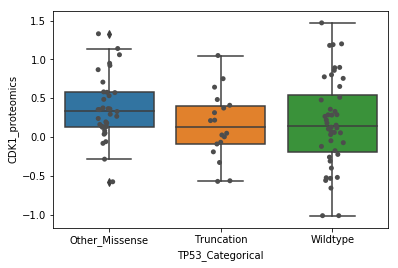

In [11]:
plot = sns.boxplot(data=proteomics_df, y = 'CDK1_proteomics', x='TP53_Categorical')
plot = sns.stripplot(data=proteomics_df, y = 'CDK1_proteomics', x='TP53_Categorical', color='.3')

#### Use wrap_ttest to do a comparison on each proteomics value, comparing samples with a hotspot mutation to those without a hotspot mutation

In [ ]:
compar_cols = list(proteomics_df.columns)
compar_cols.remove('TP53_Hotspot_Mutation')
wrap_results = ut.wrap_ttest(proteomics_df, comparison_columns=compar_cols, label_column='TP53_Hotspot_Mutation')

In [ ]:
wrap_results